In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense
from keras.models import Sequential

In [3]:
#Reading dataset
data = pd.read_csv('/train.csv')



In [4]:
#We will check the shape of the dataset and the top five elements of the dataset.
data.shape

(1157, 5)

In [5]:
#Head of the dataset
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


In [6]:
data.describe()

,CLASS
count,1157.000000
mean,0.506482
std,0.500174
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
data.isna().sum()

COMMENT_ID      0
AUTHOR          0
DATE          138
CONTENT         0
CLASS           0
dtype: int64

In [9]:
#Fill NaN values with blank space
data["DATE"] = data["DATE"].fillna(data["DATE"].mode())

data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


In [11]:
data.isnull().sum()

COMMENT_ID    0
AUTHOR        0
DATE          0
CONTENT       0
CLASS         0
dtype: int64

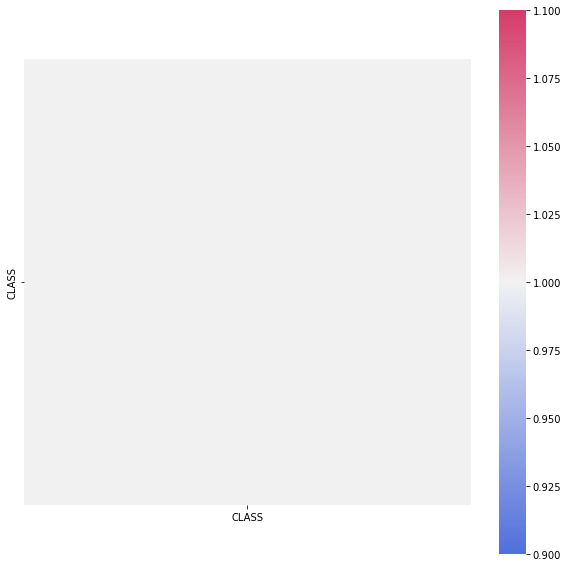

In [12]:
plt.figure(figsize = (10,10))
corr = data.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)

In [14]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [16]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text) 

In [19]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

data.CONTENT = data.CONTENT.apply(lemmatize_words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


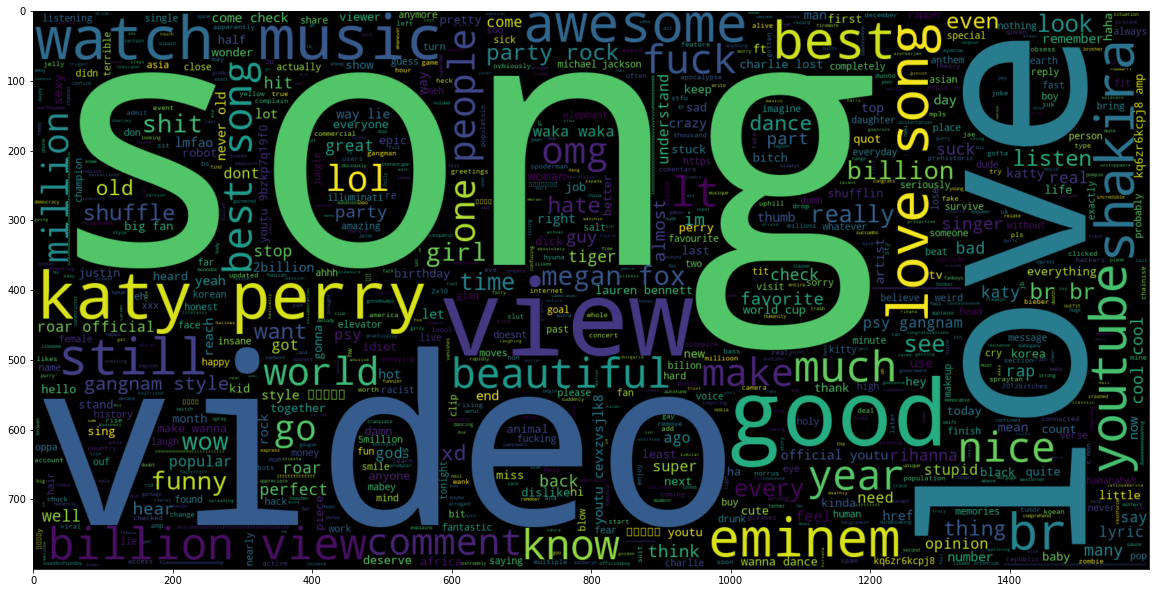

In [20]:
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(data[data.CLASS == 0].CONTENT))
plt.imshow(wc , interpolation = 'bilinear')

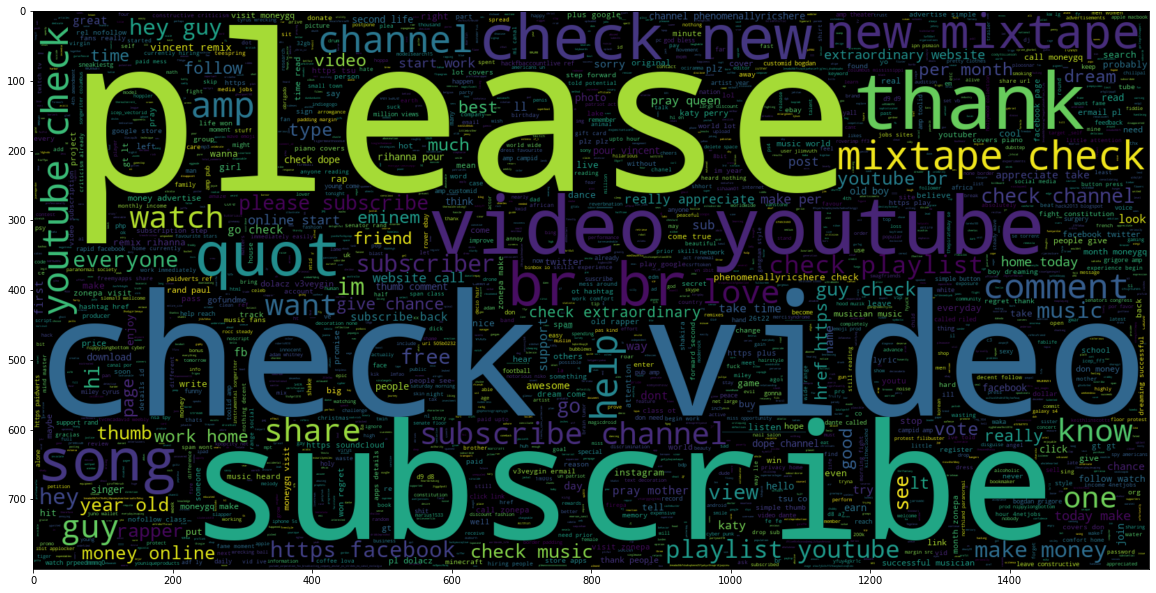

In [21]:
plt.figure(figsize = (20,20)) # Text that is fraudulent(1)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(data[data.CLASS == 1].CONTENT))
plt.imshow(wc , interpolation = 'bilinear')

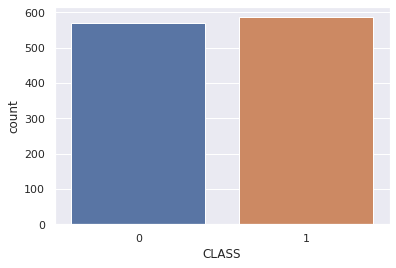

In [23]:
sns.set(style="darkgrid")
sns.countplot(x = "CLASS" , data = data)

In [25]:
train_text , test_text ,train_category , test_category = train_test_split(data.CONTENT,data.CLASS , test_size = 0.2 , random_state = 0)

In [26]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(train_text)
#transformed test reviews
cv_test_reviews=cv.transform(test_text)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (925, 12976)
BOW_cv_test: (232, 12976)


In [27]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(train_text)
#transformed test reviews
tv_test_reviews=tv.transform(test_text)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (925, 12976)
Tfidf_test: (232, 12976)


In [28]:
#training the model
mnb=MultinomialNB()
#fitting the nb for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_category)
print(mnb_bow)
#fitting the nb for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_category)
print(mnb_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [29]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)

In [30]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_category,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_category,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.603448275862069
mnb_tfidf_score : 0.603448275862069


In [31]:
mnb_bow_report = classification_report(test_category,mnb_bow_predict,target_names = ['0','1'])
print(mnb_bow_report)
mnb_tfidf_report = classification_report(test_category,mnb_tfidf_predict,target_names = ['0','1'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

           0       0.71      0.31      0.43       113
           1       0.57      0.88      0.70       119

    accuracy                           0.60       232
   macro avg       0.64      0.60      0.56       232
weighted avg       0.64      0.60      0.57       232

              precision    recall  f1-score   support

           0       0.71      0.31      0.43       113
           1       0.57      0.88      0.70       119

    accuracy                           0.60       232
   macro avg       0.64      0.60      0.56       232
weighted avg       0.64      0.60      0.57       232



In [32]:
cm_cv = confusion_matrix(test_category,mnb_bow_predict)
cm_tv = confusion_matrix(test_category,mnb_tfidf_predict)
cm_cv , cm_tv

(array([[ 35,  78],
        [ 14, 105]]), array([[ 35,  78],
        [ 14, 105]]))

In [33]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'
cm_tv = pd.DataFrame(cm_tv, index=[0,1], columns=[0,1])
cm_tv.index.name = 'Actual'
cm_tv.columns.name = 'Predicted'

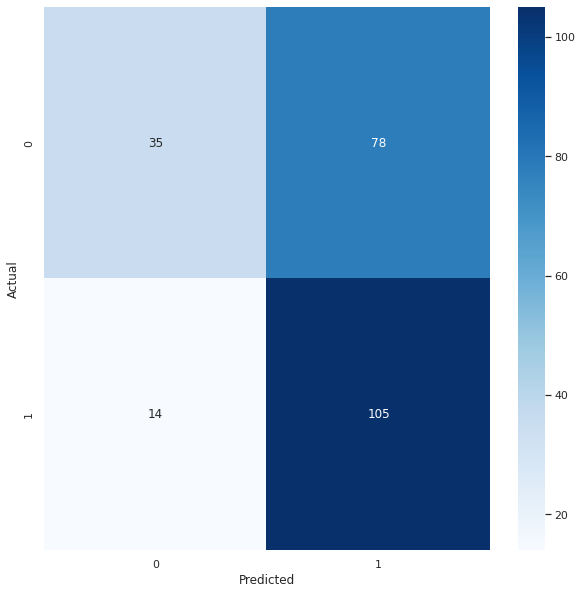

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')

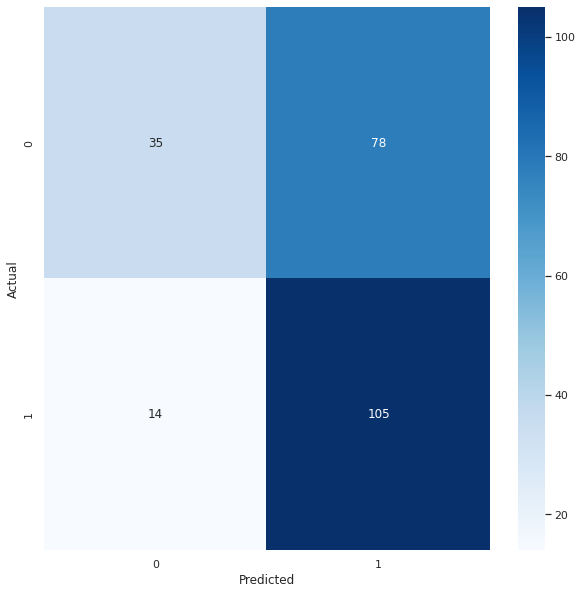

In [35]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_tv,cmap= "Blues",annot = True, fmt='')

In [36]:
model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1297700   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 1,304,296
Trainable params: 1,304,296
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(cv_train_reviews.toarray(),train_category , epochs = 20)

Epoch 1/20
29/29 [==============================] - 0s 15ms/step - loss: 0.1522 - accuracy: 0.8768
Epoch 2/20
29/29 [==============================] - 0s 15ms/step - loss: 0.1504 - accuracy: 0.8984
Epoch 3/20
29/29 [==============================] - 0s 16ms/step - loss: 0.1536 - accuracy: 0.8854
Epoch 4/20
29/29 [==============================] - 0s 15ms/step - loss: 0.1506 - accuracy: 0.8930
Epoch 5/20
29/29 [==============================] - 0s 16ms/step - loss: 0.1522 - accuracy: 0.8941
Epoch 6/20
29/29 [==============================] - 0s 15ms/step - loss: 0.1532 - accuracy: 0.8930
Epoch 7/20
29/29 [==============================] - 0s 16ms/step - loss: 0.1504 - accuracy: 0.8897
Epoch 8/20
29/29 [==============================] - 0s 15ms/step - loss: 0.1512 - accuracy: 0.8789
Epoch 9/20
29/29 [==============================] - 0s 15ms/step - loss: 0.1561 - accuracy: 0.8865
Epoch 10/20
29/29 [==============================] - 0s 15ms/step - loss: 0.1534 - accuracy: 0.8822
Epoch 11/

In [41]:
pred_cv = model.predict(cv_test_reviews)
pred_cv[:5]

array([[0.9269378 ],
       [0.9918142 ],
       [0.48060125],
       [0.5218352 ],
       [0.6537291 ]], dtype=float32)

In [42]:
pred_cv = np.around(pred_cv , decimals = 0)
pred_cv[:5]

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [43]:
accuracy_score(pred_cv,test_category)

0.6163793103448276

In [44]:
cv_report = classification_report(test_category,pred_cv,target_names = ['0','1'])
print(cv_report)

              precision    recall  f1-score   support

           0       0.76      0.31      0.44       113
           1       0.58      0.91      0.71       119

    accuracy                           0.62       232
   macro avg       0.67      0.61      0.57       232
weighted avg       0.67      0.62      0.58       232



In [45]:
cm_cv = confusion_matrix(test_category,pred_cv)
cm_cv

array([[ 35,  78],
       [ 11, 108]])

In [46]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'

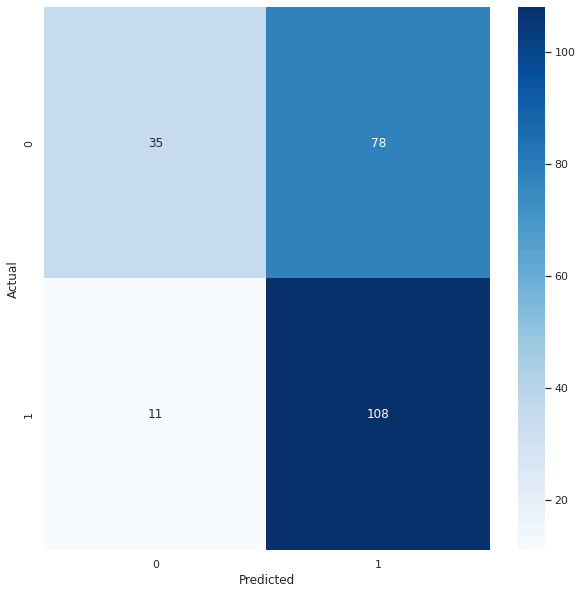

In [47]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')

In [97]:
# Importing test dataset
df_test = pd.read_csv('/test.csv')

In [98]:
df_test.columns

Index(['ID', 'COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT'], dtype='object')

In [80]:
adv_CONTENT = df_test['CONTENT']
adv_CONTENT.shape

(799,)

In [51]:
# For generating random integer
from random import randint

In [54]:
# Predicting values
row = randint(0,adv_CONTENT.shape[0]-1)
sample_news = adv_CONTENT[row]

sample_news

'I love this song sooooooooooooooo much\ufeff'

In [99]:
df_test.CONTENT = df_test.CONTENT.apply(lemmatize_words)


In [100]:
df_test.CONTENT[0]

"hey guy check new channel first vid us monkeys!!! i'm monkey white shirt,please leave like comment please subscribe!!!!"

In [101]:
df_test.head()


,ID,COMMENT_ID,AUTHOR,DATE,CONTENT
0,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,hey guy check new channel first vid us monkeys...
1,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,test say murdev.com
2,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"hey, check new website!! site kid stuff. kidsm..."
3,3,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,turn mute soon come want check views...﻿
4,4,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,check channel funny videos!!﻿


In [102]:
df_test.drop('ID', axis=1, inplace=True)

In [103]:
df_test.drop('COMMENT_ID', axis=1, inplace=True)
df_test.drop('AUTHOR', axis=1, inplace=True)
df_test.drop('DATE', axis=1, inplace=True)

In [104]:
df_test.head()

,CONTENT
0,hey guy check new channel first vid us monkeys...
1,test say murdev.com
2,"hey, check new website!! site kid stuff. kidsm..."
3,turn mute soon come want check views...﻿
4,check channel funny videos!!﻿


In [107]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  799 non-null    object
dtypes: object(1)
memory usage: 6.4+ KB


In [86]:
df_test['ID']=np.asarray(df_test['ID']).astype('float32')

In [93]:
x_array = np.asarray(df_test)

In [106]:
model.predict(df_test)

ValueError: ignored